## Дополнительный проект
В данном проекте вы поработаете с довольно нетипичными для аналитика данными: gff.tsv файлом *(обратите внимание на разделитель)*, который описывает геном мухи. При его выполнении вам может понадобиться часть конспекта про работу со строковыми данными, а именно – про строковые методы серий

### Задание 1

Какое значение атрибута Parent самое частое?

In [23]:
import pandas as pd

In [24]:
gff = pd.read_csv('gff.tsv', sep='\t')
gff.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [25]:
pattern = r'Parent=(?P<parent>[\w\.]+)'
parent = gff['attributes'].str.extract(pattern)
parent.head()

,parent
0,XM_001475631.1
1,XM_001475631.1
2,XM_001475631.1
3,XM_001475631.1
4,XM_001475631.1


In [26]:
parent['parent'].value_counts().nlargest(1)

XM_001475631.1    479
Name: parent, dtype: int64

Ответ: XM_001475631.1

### Задание 2

Какое самое частое значение в колонке type?

In [27]:
gff.type.value_counts().nlargest(1)

exon    201
Name: type, dtype: int64

Ответ: exon

### Задание 3

Постройте распределение встречаемости значений в столбце type

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type', ylabel='count'>

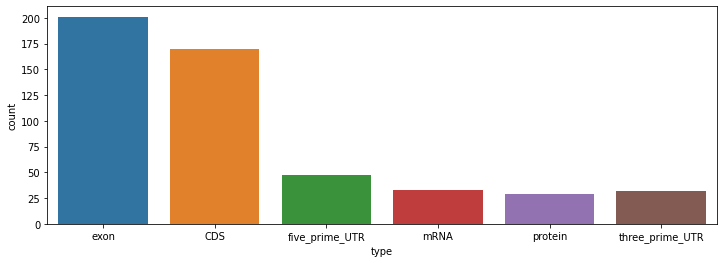

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data=gff, x='type',ax=ax)